<a href="https://colab.research.google.com/github/neohack22/IASD/blob/IA/PRIVACY_Notebook_4_Basic_Approaches_kAnonymity_lDiversity_tCloseness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Anonymity + L-Diversity + T-Closeness

In the late 1990's Sweeney published several articles in which she proposed the concept of k-anonymity. Among them we cite the most famous one [1] published in 2002. At the time when anonymization was referring to the concept now known as depseudonymization. As we already discussed pseudonymization is the replacement of all directly identifying data (such as the social security number) with a random value (pseudonym). Sweeney showed in [1] that it was possible to re-identify a pseudonymized relational database (SQL or more generally a tabular file) and proposed a simple notion to prevent these kind of leak from hapenning.

## K-Anonymity

Let us suppose that we have a dataset that contains $N$ entries.
Each entry consists of a list of $D$ attributes $X_i$ ($i \in [0,D]$) that contain (non-sensitive) information about a person, such as age, gender, zip code of residence, etc. These attributes are called "quasi-identifiers", as combining several of them into a "super-identifier" can often uniquely identify a person even in large datasets (e.g. the combination of gender, age and zip code might be so specific that only a single person in a dataset has a given combination see [1] for more details).

k-anonymity protects the privacy of individual persons by pooling their attributes into groups of at least $k$ people. In addition, the model assumes that the dataset contains a single sensitive attribute that contains e.g. information about a person's income and that we want to protect. The method can also be generalized to datasets with more than one sensitive attribute or datasets where there's no clear distinction between quasi-identifiers and sensitive attributes. For this case study we will look at the simple case though. Now, k-anonymity demands that we group individual rows/persons of our dataset into group of at least $k$ rows/persons and replace the quasi-identifier attributes of these rows with aggregate quantities, such that it is no longer possible to read the individual values. This protects people by ensuring that an adversary who knows all values of a person's quasi-identifier attributes can only find out which group a person might belong to but not know if the person is really in the dataset.

The main advantage of k-anonymity is that it is easy to understand. However, the model is not robust when the sensitive values associated with a given quasi-identifier value are all identical. In this case, we can deduce that all people with this quasi-identifier value have the same sensitive data, which we are able to deduce. It is therefore impossible to ensure that the risk of re-dentification is limited, which means that a use of k-anonymity alone does not offer reasonable guarantees of anonymity. This problem can be fixed by using an extension of k-anonymity called "l-diversity".

## L-Diversity 

l-diversity, first introduced in 2007 in [2], ensures that each k-anonymous group contains at least l different values of the sensitive attribute. Therefore, even if an adversary can identify the group of a person he/she still would not be able to find out the value of that person's sensitive attribute with certainty. However, even when using l-diversity an adversary could still learn some information about a person's sensitive attribute using probabilistic reasoning: If, for example, 4 out of 5 people in a 5-anonymous group possess a given value of the sensitive attribute, an attacker can reason that a given person who he/she knows is part of the group will -with high probability- possess that value.
Again, this problem can be fixed by extending k-anonymity using a so-called "t-closeness" criterion. 

## T-Closeness

t-closeness, also introduced in 2007 in [3], demands that the statistical distribution of the sensitive attribute values in each k-anonymous group is "close" to the overall distribution of that attribute in the entire dataset. Typically, the closeness between two probability vectors $p=(p_1,...,p_l)$ and $q=(q_1,...,q_l)$ can be measured using e.g. the Kullback-Leibler (KL) divergence defined as follows: $$ D_{KL}(p,q) = \sum_{i=1}^{l}p_i \log(\frac{p_i}{q_i}).$$
An adversary could then only learn a limited amount of information from comparing the distribution of the values in the group to the distribution in the entire dataset.

Then begins to ask the question of the usefulness of the data. Due to proximity constraints, the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.
Of course, k-anonymity, l-diversity and t-closeness all limit the amount of information that a legitimate user can learn from the data as well, so typically we need to balance the degree of privacy against the utility of the resulting data. Eventhough the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.

## Implementing privacy conditions

Turning a dataset into a k-anonymous (and possibly l-diverse or t-close) dataset is a complex problem. Meyerson and Williams have shown in [4] that finding the optimal transformation of the database NP-difficult. Fortunately, several practical algorithms exists that often produce "good enough" results by employing greedy search techniques.

In this notebook, we will explore the so-called "Mondrian" (see [5] for more details) algorithm, which uses a greedy search method to partition the original data into smaller and smaller groups. The algorithm assumes that we have converted all attributes into numerical or categorical values and that we're able to measure the "span" of a given data attribute $X_i$ ("span" will be detailed later).

### Partitioning

The algorithm proceeds then as follows to partition the data into k groups:

1. Initialize the final set of partitions to an empty set $P_{final} = \{\}$.
2. Initialize the temporary set of paritions to a set containing a partition with the entire dataset $P_{temp} = \{\{1, 2,\dots ,N\}\}$.
4. While there are partitions in the temporary set, pop one partition from it.
  * Calculate the relative spans of all columns in the partition.
  * Sort the resulting columns by their span (in descending order) and iterate over them. For each column,
      * Try to split the partition along that column using the median of the column values as the split point.
      * Check if the resulting partitions are valid according to k-anonymity (and possibly additional) criteria.
      * If yes, add the two new partitions to the temporary set and break out of the loop.
  * If no column produced a valid split, add the original partition to the set of final partitions.
5. Return the final set of partitions

### Data Aggregation

After obtaining the partitions we still need to aggregate the values of the quasi identifiers and the sensitive attributes in each k-anonymous group. For this, we can e.g. replace numerical attributes with their range (e.g. "age: 24-28") and categorical attributes with their union (e.g. "employment-group: [self-employed, employee, worker]"), though other aggregations are possible. An open source tool developed by the Technological University of Munich, ARX (see [6]) allows anonymisation according to many models from original data in tabular format. The tool also makes it possible to estimate the risks of de-anonymization according to the models presented above, and even in a finer way by calculating the distribution of the probabilities of de-anonymization and not simply the maximum values.

## Biliography

- [1] [k-Anonymity: A Model For Protecting Privacy](https://epic.org/privacy/reidentification/Sweeney_Article.pdf)
- [2] [l-Diversity: Privacy Beyond k-Anonymity](https://personal.utdallas.edu/~muratk/courses/privacy08f_files/ldiversity.pdf)
- [3] [t-Closeness: Privacy Beyond k-Anonymity and l-Diversity](https://www.cs.purdue.edu/homes/ninghui/papers/t_closeness_icde07.pdf)
- [4] [On the Complexity of Optimal K-Anonymity](http://www.aladdin.cs.cmu.edu/papers/pdfs/y2004/kanonim.pdf)
- [5] [Mondrian - Multidimensional k-Anonymity](https://www.utdallas.edu/~muratk/courses/privacy08f_files/MultiDim.pdf)
- [6] [Putting statistical disclosure control into practice: The ARX data anonymization tool](https://link.springer.com/chapter/10.1007/978-3-319-23633-9_6)


We use Pandas to work with the data as it makes working with categorical data very easy

In [1]:
#%pip install pandas
import pandas as pd

Here's below a list of the column names in our dataset (as the file doesn't contain any headers).

In [2]:
names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)

# some fields are categorical and will require special treatment
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))
df = pd.read_csv("/content/adult.all.txt", sep=", ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
for name in categorical:
    df[name] = df[name].astype('category')

In [6]:
df.dtypes["income"]

CategoricalDtype(categories=['<=50k', '>50k'], ordered=False)

## Exercise

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [7]:
df.dtypes["income"] == "categorical"

False

In [9]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe of reference
    :param partition: the partition for which to calculate the spans
    df.[]
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    
   
# scale is a dictionary with the column name and the value to normalize the column    

    
    dic={}
    for colonne in df.columns:
# we go through all the columns and we define the pair column: span      
      if colonne in categorical:
        valeur=len(df[colonne][partition].unique())
      else:
        valeur = df[colonne][partition].max()-df[colonne][partition].min()
      if scale:
        valeur=valeur/scale[colonne]  # scale is a dictionary
      # otherwise we leave the span
      dic[colonne]= valeur
    return dic


In [10]:
# span of the whole dataset
full_spans = get_spans(df, df.index) # on filtre les index
full_spans

{'age': 73,
 'workclass': 9,
 'fnlwgt': 1478115,
 'education': 16,
 'education-num': 15,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital-gain': 99999,
 'capital-loss': 4356,
 'hours-per-week': 98,
 'native-country': 42,
 'income': 2}

## Exercise

**Implement a `split` function that takes a dataframe, partition and column and returns two partitions that split the given partition such that all rows with values of the column `column` below the median are in one partition and all rows with values above or equal to the median are in the other.**

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50k
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


In [12]:
df.loc[0:4]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


In [13]:
df["age"].median()

37.0

In [14]:
split1 = df.iloc[0:int(df["age"][df.index].median())]
split1.index

RangeIndex(start=0, stop=37, step=1)

In [15]:
split1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50k
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50k
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50k
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50k
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50k


In [16]:
# pick the column to calculate the median

def split(df, partition, column):
    """
    :param        df: The dataframe of reference
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    df_part = df[column][partition]
    if column in categorical:
        valeurs_uniques = df_part.unique()
        N=len(valeurs_uniques)//2
        l1=set(valeurs_uniques[:N])
        l2=set(valeurs_uniques[N:])
        return df_part.index[
            df_part.isin(l1)], df_part.index[df_part.isin(l2)]
    else:        
        mediane = df_part.median()
        dfl1 = df_part.index[df_part < mediane]
        dfl2 = df_part.index[df_part >= mediane]
        return (dfl1, dfl2)


split(df,df.index,"age")

(Int64Index([    4,     8,    11,    12,    13,    15,    16,    17,    22,
                26,
             ...
             48810, 48817, 48819, 48821, 48824, 48830, 48833, 48834, 48836,
             48841],
            dtype='int64', length=23694),
 Int64Index([    0,     1,     2,     3,     5,     6,     7,     9,    10,
                14,
             ...
             48827, 48828, 48829, 48831, 48832, 48835, 48837, 48838, 48839,
             48840],
            dtype='int64', length=25148))

## Exercise

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm discussed above, using a k-anonymous criterion for the partitions you create.**

In [36]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
# The set suggested in the algorithm might not be a python set so we chose a list instead    
    finished_partitions = [] 
    temp_partitions = [df.index] #{}
    #print(temp_partitions)
    while (len(temp_partitions) > 0):
        partition = temp_partitions.pop(0)
        #print("partition : ", partition)
        partition_spans = get_spans(df[feature_columns], partition, scale)
        #print("partition_spans :",partition_spans)
        for column in partition_spans.keys():
            #we try to split this partition along a given column
            part1, part2 = split(df, partition, column)
            if not is_valid(
 # "not" is needed to possibly include additional complexity later on
                df, part1, sensitive_column) or not is_valid(
                    df, part2, sensitive_column):
                continue
# the split is valid, we put the new partitions on the list and continue            
            temp_partitions.extend((part1, part2))
            break
        else:
# no split was possible, we add the partition to the finished partitions            
            finished_partitions.append(partition)
    return finished_partitions
    
# partition dataset returns nested lists of index, one list per partition

Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithms can take several minutes when running on the entire dataset) 

We apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute.

In [37]:
feature_columns = ['age', 'hours-per-week']
sensitive_column = 'income'
final_partitions = partition_dataset(
    df, feature_columns, sensitive_column, full_spans, is_k_anonymous)

In [19]:
# we get the number of partitions that were created
len(final_partitions)

655

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rectangles to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rectangles should not overlap and cover the entire dataset.

In [20]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [21]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[
            column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[
            column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [38]:
feature_columns

['age', 'hours-per-week']

In [39]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(df)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(
    df, final_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [40]:
# let's see how our rectangles look like
rects[:10]

[((37.0, 40.0), (38.0, 99.0)),
 ((41.0, 40.0), (43.0, 99.0)),
 ((22.0, 40.0), (23.0, 99.0)),
 ((23.0, 40.0), (24.0, 97.0)),
 ((24.0, 40.0), (25.0, 99.0)),
 ((25.0, 40.0), (27.0, 99.0)),
 ((27.0, 40.0), (28.0, 99.0)),
 ((28.0, 40.0), (29.0, 99.0)),
 ((29.0, 40.0), (30.0, 99.0)),
 ((32.0, 40.0), (33.0, 99.0))]

In [41]:
# we plot the rectangles
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(
            patches.Rectangle(
                (xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

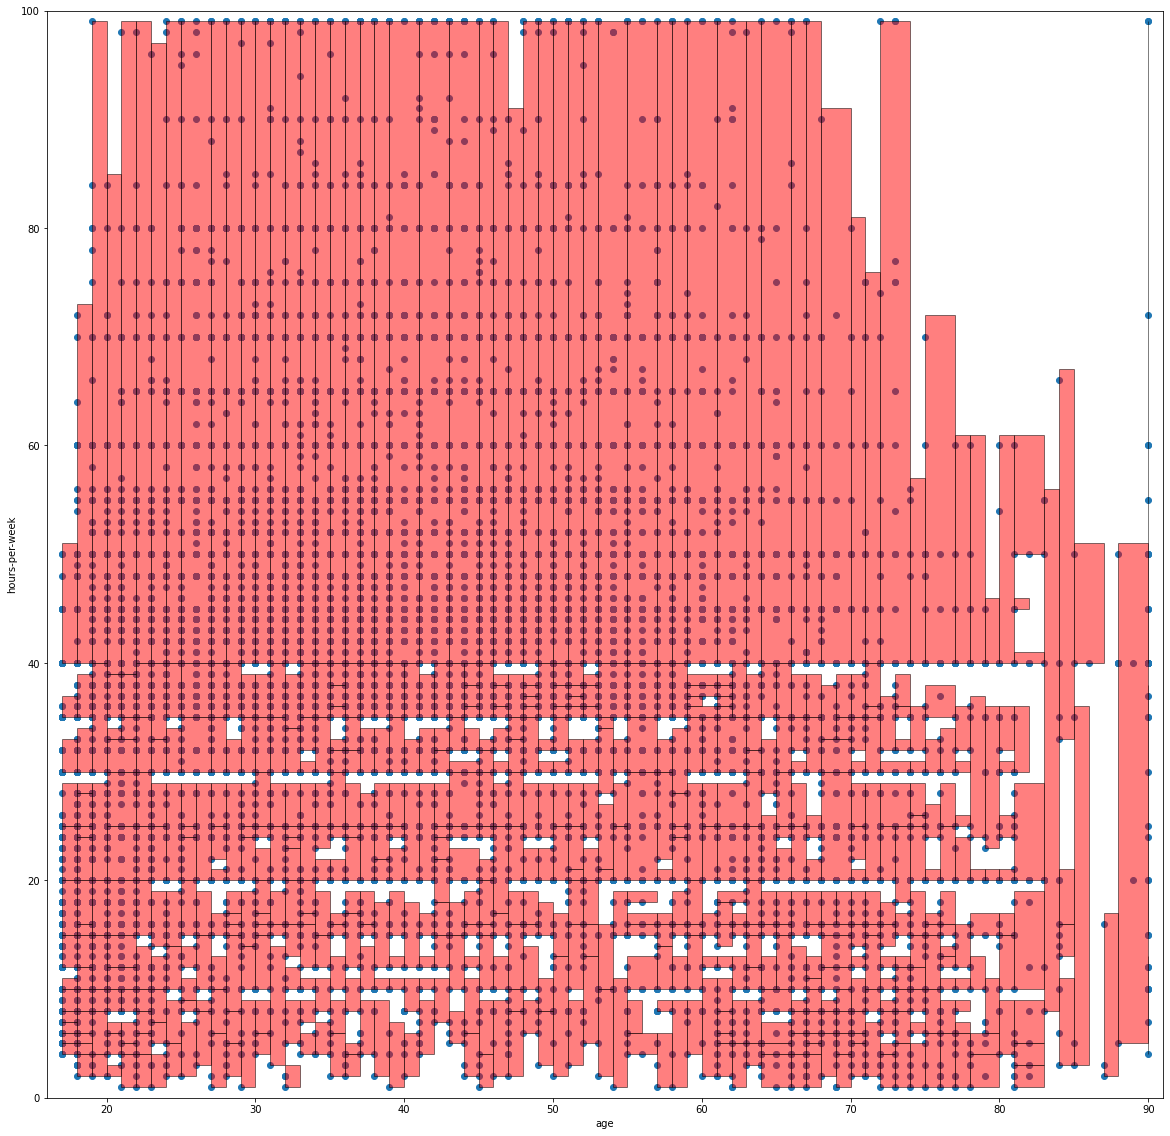

In [42]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(df[column_x], df[column_y])

**Brifely analyze the result we get.**

There are some partitions which are split and others not: the white areas correspond to the non-splitted partitions.

We have a set of 655 rectangles corresponding to each of the identified partitions.

The rectangles do not overlap, indicating that each group represents a different population for the couple ["age","hours_of_work"].

Each group has at least 3 people (equal to the value k) and much more in practice.

The rectangles cover ranges of value related to ages and hours_of_work.<br>
It appears that some rectangles are very small, which could lead to a risk of deanonymization on those partitions.<br>
Indeed, the less values we have within a set, the less diversified the values to deanonymize from.

We also see that it is harder to know which age group works beyond 40 hours. It should ensure a certain anonymization for this feature as we can't distinguish partitions apart.

# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [43]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [44]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Final {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.to_dict()
        #.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            cr = {}
            for k, v in values.items():
                if type(v) == list:
                    cr[k]  = v[0]
                else:
                    cr[k] = v
            rows.append(cr)# values.copy())
    return pd.DataFrame(rows)

In [45]:
dfn = build_anonymized_dataset(
    df, final_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...
Final 401 partitions...
Final 501 partitions...
Final 601 partitions...


We sort the resulting dataframe using the feature columns and the sensitive attribute.

In [46]:
dfn.sort_values(feature_columns+[sensitive_column])

,age,hours-per-week,income,count
269,17.0,4.000000,<=50k,4
452,17.0,5.000000,<=50k,9
453,17.0,6.000000,<=50k,9
270,17.0,7.000000,<=50k,5
271,17.0,8.136364,<=50k,22
...,...,...,...,...
1033,90.0,18.800000,<=50k,4
1034,90.0,18.800000,>50k,1
1035,90.0,32.400000,<=50k,5
811,90.0,47.027027,<=50k,25


# Implementing l-diversity (the naive way)

Now let's see how we can implement l-diversity in order to protect the privacy of the persons in the dataset even better. To implement l-diversity, we can do the following things:

* Modify our `is_valid` function to not only check for the size of a given partition but also ensure that the values of the sensitive attribute in the partition are diverse enough.
* Modify the `split` function to produce splits that are diverse (if possible).

Here we will only implement the first point to keep things simple, please keep in mind that this is not the smartest way to implement l-diversity, as our "naive" splitting function might produce invalid splits even when it would actually be possible to produce a valid one.

## Exercise

**Implement a validator function that returns `True` if a given partition contains at least `l` different values of the sensitive attribute, `False` otherwise.**

In [48]:
def is_l_diverse(df, partition, sensitive_column, l=2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param                l: The minimum required diversity of sensitive attribute values in the partition
    """
    return     (len(df.loc[partition][sensitive_column].unique()) >= l)

len() calculates here the number of distinct values in the supposed sensitive column, income, in this case.

In [49]:
# now let's apply this method to our data and see how the result changes
final_l_diverse_partitions = partition_dataset(
    df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_l_diverse(*args))

In [50]:
len(final_l_diverse_partitions)

390

In [51]:
column_x, column_y = feature_columns[:2]
l_diverse_rects = get_partition_rects(
    df, final_l_diverse_partitions, column_x, column_y, indexes, offsets=[
        0.0, 0.0])

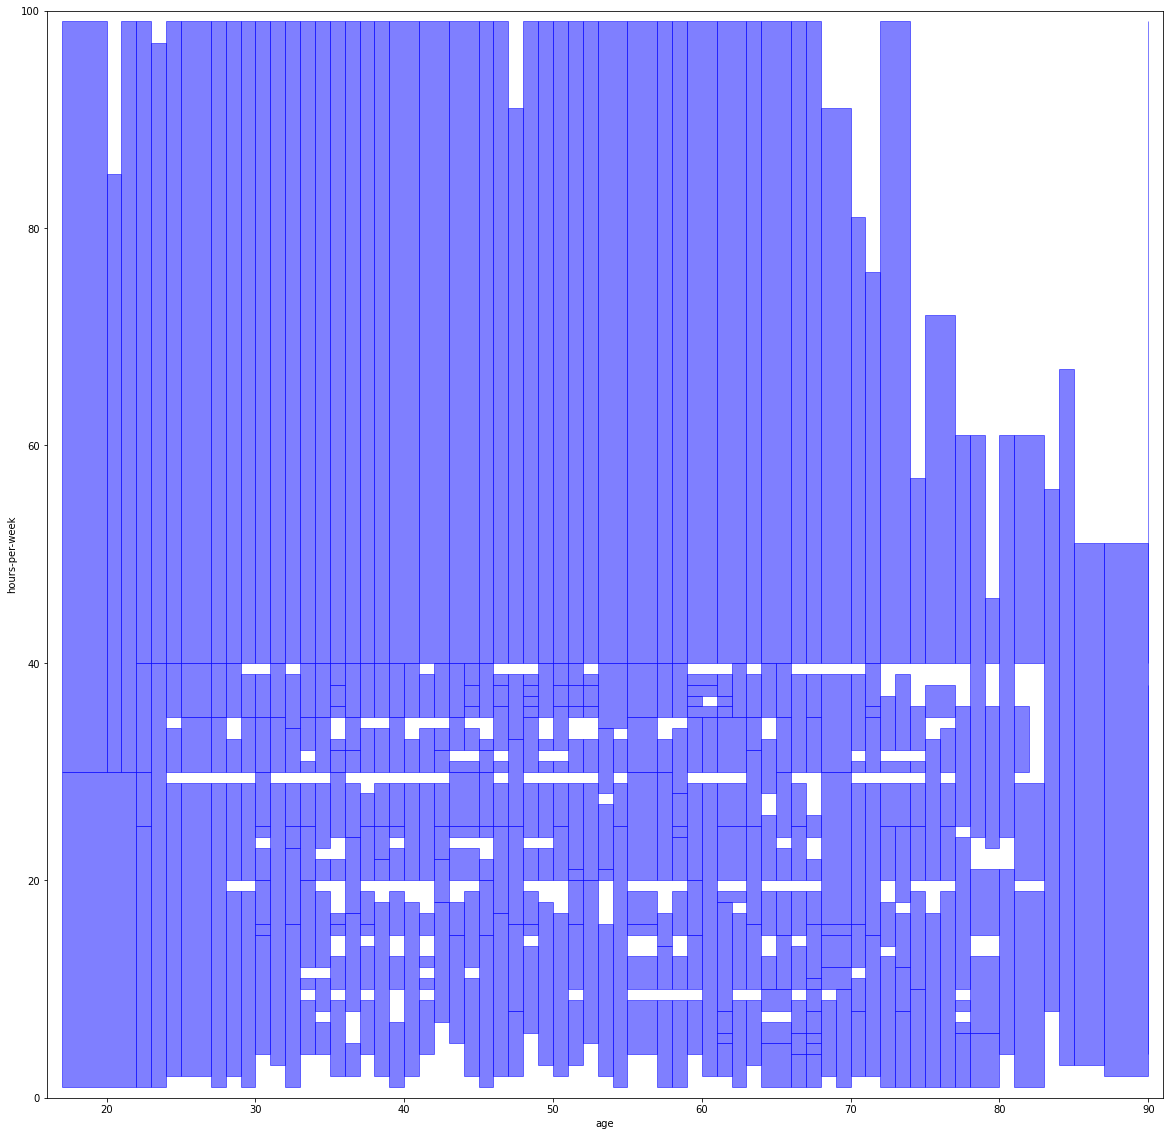

In [52]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(
    df, ax, l_diverse_rects, column_x, column_y, edgecolor='b', facecolor='b')

**Brifely analyze the result we get. Compare with simple k-anonymity**



By using l-diversity we decrease the number of partitions to 337, which is logical since we have added an additional constraint on the content of each partition.

We see that the rectangles have increased in size, which indicates that the criteria on the population of each of the groups have widened, leaving less room for the common identification of individuals.

But there still are rectangles with few individuals, which can leave the possibility of deduction to an adverse agent.

In [53]:
# again we build an anonymized dataset from the l-diverse partitions
dfl = build_anonymized_dataset(df, final_l_diverse_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...


In [54]:
# Let's see how l-diversity improves the anonymity of our dataset
dfl.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
2,18.424908,38.243590,<=50k,1090
3,18.424908,38.243590,>50k,2
0,18.769045,17.997589,<=50k,2073
1,18.769045,17.997589,>50k,1
8,20.000000,39.205094,<=50k,745
...,...,...,...,...
779,87.909091,26.909091,>50k,1
684,90.000000,18.388889,<=50k,17
685,90.000000,18.388889,>50k,1
686,90.000000,47.027027,<=50k,25


# Implementing t-closeness

As we can see, for regions where the value diversity is low, our l-diverse method produces partitions that contain a very large number of entries for one value of the sensitive attribute and only one entry for the other value. This is not ideal as while there is "plausible deniability" for a person in the dataset (after all the person could be the one "outlier") but an adversary can still be very certain about the person's attribute value in that case.

t-closeness solves this problem by making sure that the distribution of sensitive attribute values in a given partition is similar to the distribution of the values in the overall dataset. We'll implement a naive (and not efficient / correct) version of t-closeness below. As with the l-diversity case, it would be better to tailor the `split` function to produce partitions that are t-close, which would increase the efficiency of the method.

## Exercise

**Implement a version of the `is_valid` function that returns `True` if the partition is diverse enough and `False` otherwise. To measure diversity, calculate the total variation distance (easier to implement compared to KL) between the empirical probability distribution of the sensitive attribute over the entire dataset vs. the distribution over
the partition. Hint: the total variation distance is the maximum pointwise absolute difference between the two distributions. You can assume that the sensitive attribute is a categorical value.**

In [55]:
# here we generate the global frequencies for the sensitive column 
global_freqs = {}
total_count = float(len(df))
group_counts = df.groupby(sensitive_column)[sensitive_column].agg('count')
for value, count in group_counts.to_dict().items():
    p = count/total_count
    global_freqs[value] = p

In [56]:
global_freqs

{'<=50k': 0.7607182343065395, '>50k': 0.23928176569346055}

We will calculate the difference between the overall frequency and the frequency of the partition concerned (for each possible value of the sensitive variable).

We will then check that for each value taken (here, with income, there are 2), the difference is not greater than 20% (otherwise, the distribution would be too different from that of the original dataset.

In [57]:
def is_t_close(df, partition, sensitive_column, global_freqs, p=0.2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param     global_freqs: The global frequencies of the sensitive attribute values
    :param                p: The maximum allowed Kolmogorov-Smirnov distance
    """
    total_count = float(len(partition))
   
    d_max = None
    group_counts = df.loc[
        partition].groupby(sensitive_column)[sensitive_column].agg('count')
    
    for value, count in group_counts.to_dict().items():
        p_part = count/total_count
        
        d = abs(p_part-global_freqs[value])
        #print("d=",d)
        if d_max is None or d > d_max:
            d_max = d
    #print("d_max=",d_max)
    return (d_max <= p)

In [58]:
# Let's apply this to our dataset
final_t_close_partitions = partition_dataset(
    df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(
        *args) and is_t_close(*args, global_freqs))

In [59]:
len(final_t_close_partitions)

264

In [60]:
dft = build_anonymized_dataset(
    df, final_t_close_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...


In [61]:
# Let's see how t-closeness fares
dft.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
0,27.178020,38.975774,<=50k,20746
1,27.178020,38.975774,>50k,2948
84,37.000000,5.800000,<=50k,3
85,37.000000,5.800000,>50k,2
86,37.000000,11.571429,<=50k,6
...,...,...,...,...
527,87.909091,26.909091,>50k,1
458,90.000000,18.388889,<=50k,17
459,90.000000,18.388889,>50k,1
460,90.000000,47.027027,<=50k,25


In [62]:
column_x, column_y = feature_columns[:2]
t_close_rects = get_partition_rects(
    df, final_t_close_partitions, column_x, column_y, indexes, offsets=[
        0.0, 0.0])

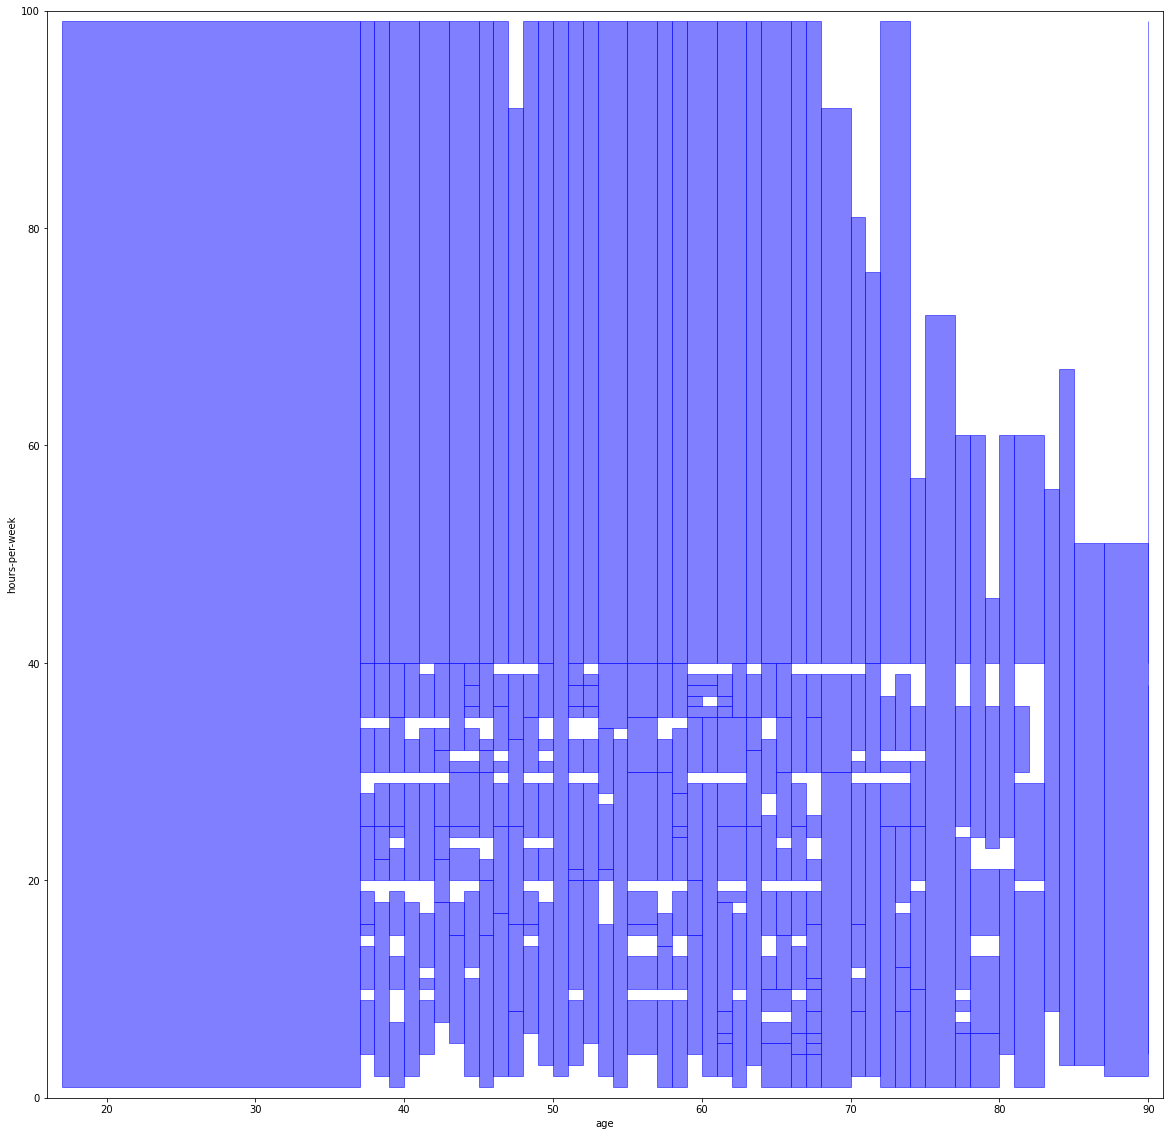

In [63]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(
    df, ax, t_close_rects, column_x, column_y, edgecolor='b', facecolor='b')

## Exercise

**Brifely analyze the result we get. Compare with simple l-diversity and simple k-anonymity**

It is the way the partition is splitted with regards to the label that makes certain data isolated within a group. But, the encompassing criteria of l-diversity and t-closeness result in fewer partitions than simple l-diversity.

With k-anonymity, we saw that we have about 30% of groups that have less than 3 entries and therefore we could wonder why they do not respect the given rule of k-anonymity.

In fact, a distinction was made on the label within the same group, if this group contains data having both possible values "<=50k" and ">50k".

This is why, if we take the example of lines 888 and 889, we have the same "age" and "hours-per-week" features but a split was necessary to identify the group with different salary levels. This is how we end up with a group with a single value.

It still gives ideas of salary distributions within the same group, which wasn't as efficient as l-diversity.